## The Trend and Distribution Study of CO2 and Temperature in North America

#### lx2251 Lin Xing

In [1]:
import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

**The datasets are downloaded from the CT2017 research project of NOAA.**

In [2]:
# from zenodo:
! wget https://zenodo.org/record/3566026/files/CO2_Tem_Data.zip
# or from ftp sites: 
#! wget ftp://aftp.cmdl.noaa.gov/products/carbontracker/co2/CT2017/molefractions/co2_total_monthly/CT2017.molefrac_nam1x1_*.nc

--2019-12-07 01:11:33--  https://zenodo.org/record/3566026/files/CO2_Tem_Data.zip
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334401863 (319M) [application/octet-stream]
Saving to: ‘CO2_Tem_Data.zip’

CO2_Tem_Data.zip    100%[===================>] 318.91M  19.3MB/s    in 16s     

2019-12-07 01:11:51 (19.5 MB/s) - ‘CO2_Tem_Data.zip’ saved [334401863/334401863]



In [3]:
! unzip -o CO2_Tem_Data.zip

Archive:  CO2_Tem_Data.zip
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-01.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-02.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-03.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-04.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-05.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-06.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-07.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-08.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-09.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-10.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-11.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2000-12.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2001-01.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2001-02.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_nam1x1_2001-03.nc  
  inflating: CO2_Tem_Data/CT2017.molefrac_n

In [4]:
ds = xr.open_mfdataset('CO2_Tem_Data/CT2017*.nc', combine='by_coords')
ds

<xarray.Dataset>
Dimensions:              (boundary: 26, calendar_components: 6, latitude: 40, level: 25, longitude: 66, time: 204)
Coordinates:
  * boundary             (boundary) int32 1 2 3 4 5 6 7 ... 20 21 22 23 24 25 26
  * calendar_components  (calendar_components) int32 1 2 3 4 5 6
  * latitude             (latitude) float64 22.5 23.5 24.5 ... 59.5 60.5 61.5
  * level                (level) int32 1 2 3 4 5 6 7 8 ... 19 20 21 22 23 24 25
  * longitude            (longitude) float64 -128.5 -127.5 ... -64.5 -63.5
  * time                 (time) datetime64[ns] 2000-01-16T12:00:00 ... 2016-12-16T12:00:00
Data variables:
    air_mass             (time, level, latitude, longitude) float32 dask.array<shape=(204, 25, 40, 66), chunksize=(1, 25, 40, 66)>
    blh                  (time, latitude, longitude) float32 dask.array<shape=(204, 40, 66), chunksize=(1, 40, 66)>
    co2                  (time, level, latitude, longitude) float32 dask.array<shape=(204, 25, 40, 66), chunksize=(1, 25, 

## 1  The recent trend of CO2 and temperature in North America

**The graphs show recent trend of CO2 level and compare the trends of CO2 and temperature.** 

From the first graph, we can see that the CO2 concentration in NA is rising at a stable rate from the beginning of the 21th century, which means that the emission control and other efforts to close the carbon cycle are not working well. The dashed red line with point symbols represents the monthly mean values of CO2 in the original dataset, centered on the middle of each month. The black line with point symbols showed the 1 year resample values of CO2, labeled on the beginning of each year.

For the second graph, I want to compare the trend of increasing CO2 and the variation of temperature. It is obvious that on a relatively small time scale (from 2000 to 2016), they are not closely related with each other. But we can still find that the mean temperature of 2016 is higher than the temperature of 2000 for about 0.5 celsius degree. The black line with point symbols and the red line with star symbols represent 1 year resample CO2 and 1 year resample temperature respectively. 

In [5]:
# resamble dataset
ds1 = ds.resample(time = '1Y',label='left').mean(dim='time')

C_time = ds.co2.mean(dim=['latitude','longitude','level'])
C_time_year = ds1.co2.mean(dim=['latitude','longitude','level'])
T_time_year = ds1.temperature.mean(dim=['latitude','longitude','level'])

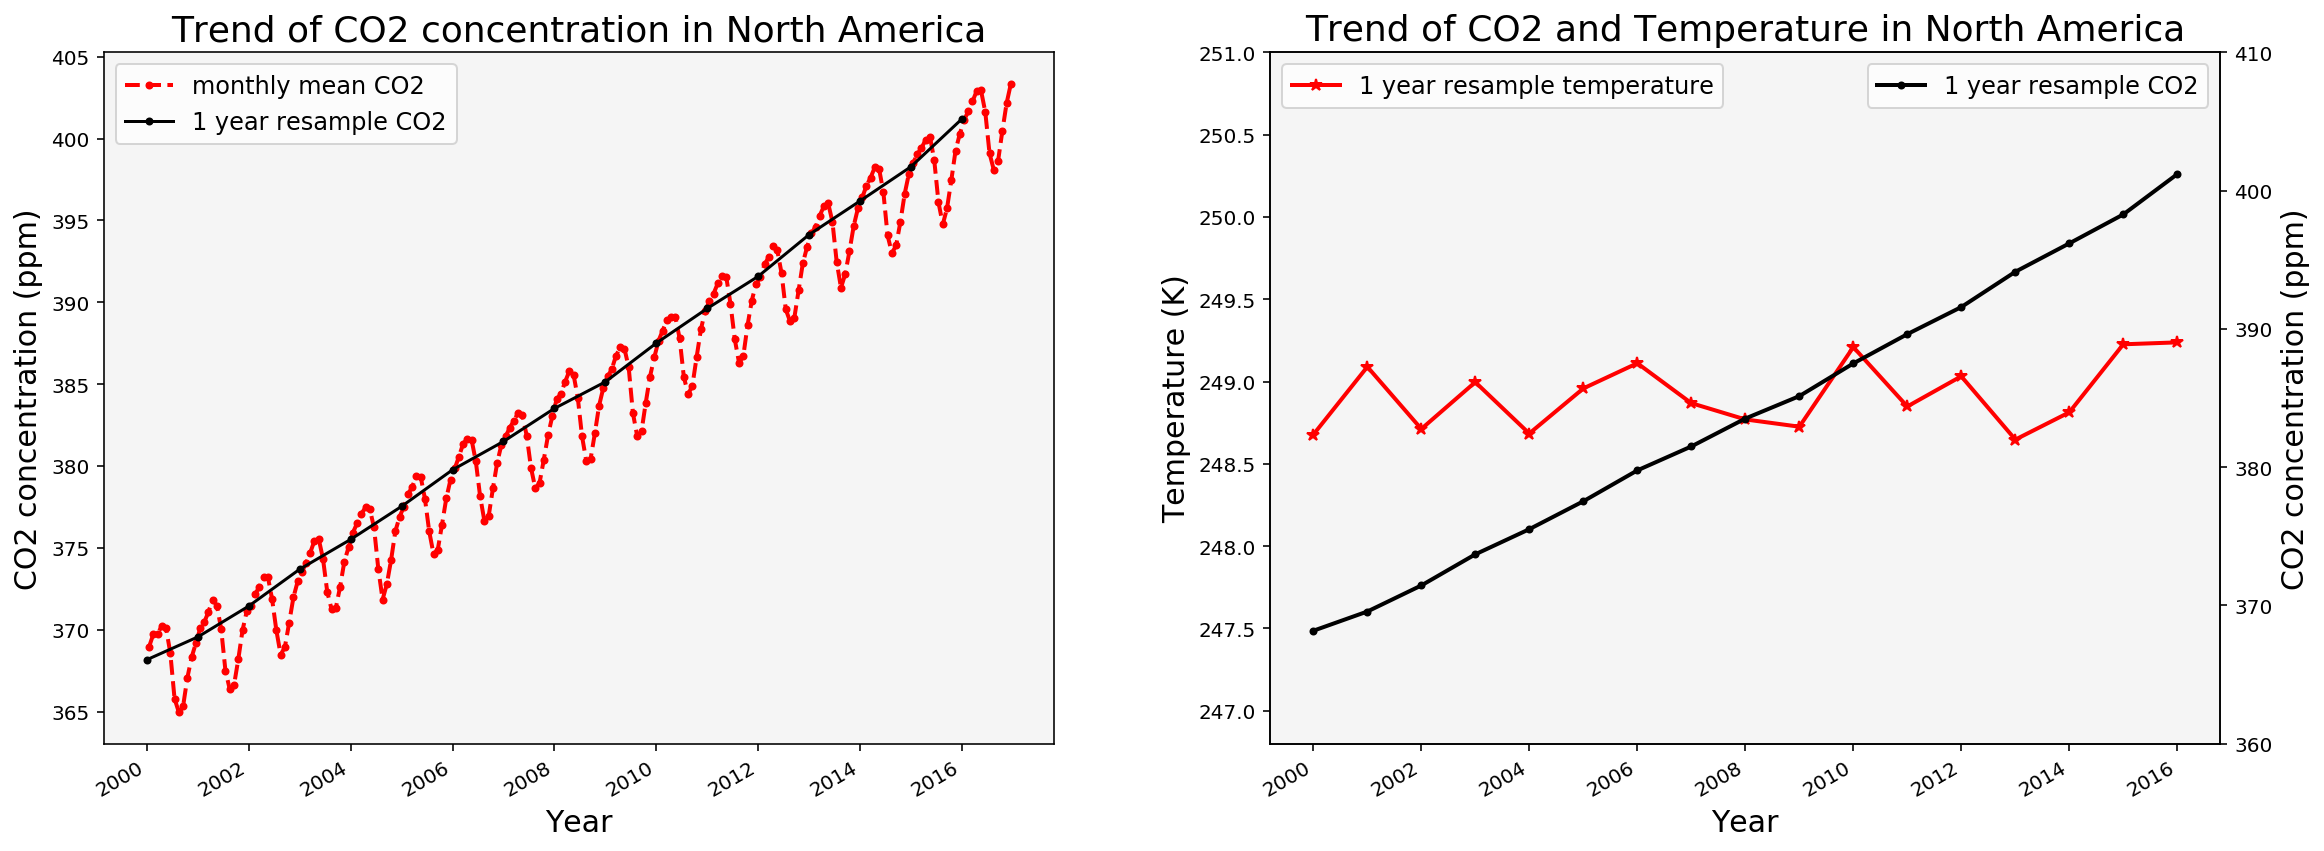

In [7]:
fig = plt.figure()

ax1 = fig.add_axes([1,0,1.1,1.2],facecolor='whitesmoke')
C_time.plot(ax=ax1,color='r',marker='.',linestyle='dashed',linewidth=2,label='monthly mean CO2');
C_time_year.plot(ax=ax1,color='k',marker='.',linewidth=1.5, label='1 year resample CO2');
ax1.set_title('Trend of CO2 concentration in North America',fontsize=18)
ax1.set_xlabel('Year',fontsize=15)
ax1.set_ylabel('CO2 concentration (ppm)',fontsize=15)
ax1.legend(prop={'size': 12})

ax2 = fig.add_axes([2.35,0,1.1,1.2],facecolor='whitesmoke')
T_time_year.plot(ax=ax2,marker='*',color='r',linewidth=2,label='1 year resample temperature');
ax2.set_ylabel('Temperature (K)',fontsize=15)
ax2.set_title('Trend of CO2 and Temperature in North America',fontsize=18)
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylim(246.8,251.0)
ax2.legend(loc='upper left',prop={'size': 12})

# Plot 1 figure with 2 y axes
ax3 = ax2.twinx()
C_time_year.plot(ax=ax3,marker='.',linewidth=2, color='k',label='1 year resample CO2');
ax3.set_ylabel('CO2 concentration (ppm)',fontsize=15)
ax3.set_ylim(360.0,410.0)
ax3.legend(prop={'size': 12})

## 2 The anomalies of CO2, temperature and other relavant parameters in North America

**The graphs show the anomalies of CO2, temperature, geopotential height, pressures, specific humidity and boundary layer thickness.**

The anomaly data are calculated by group the original data by months. With the anomaly data, we can view the CO2 and other climate parameters without the influence of seasonal cycles. The results allow us to tell the differences between the data of specific time periods and the average.The geopotential heights and pressures data are from the model layer interfaces, while temperature and specific humidity are from the model layers. 

The first graph shows the anomaly of CO2, which is consistant with the graph above. The second graph (on the upper right) shows the anomaly of planery boundary thickness. The third graph shows the anomalies of temperature and specific humidity. The last graph shows the anomalies of geopotential height and pressure. Temperature and humidity are plotted together because they are closely related to each other, and the reason for plotting geographical height and pressure together is the same. With these graphs, we can see the anomalies of different climate parameters of every month from 2000 to 2016 in NA, and the results reveal the extent of unstability of the climate. For example, the high anomaly of temperature and geopotential height in 2014-2016 may be attributed to the impacts of Central Pacific El Niños.

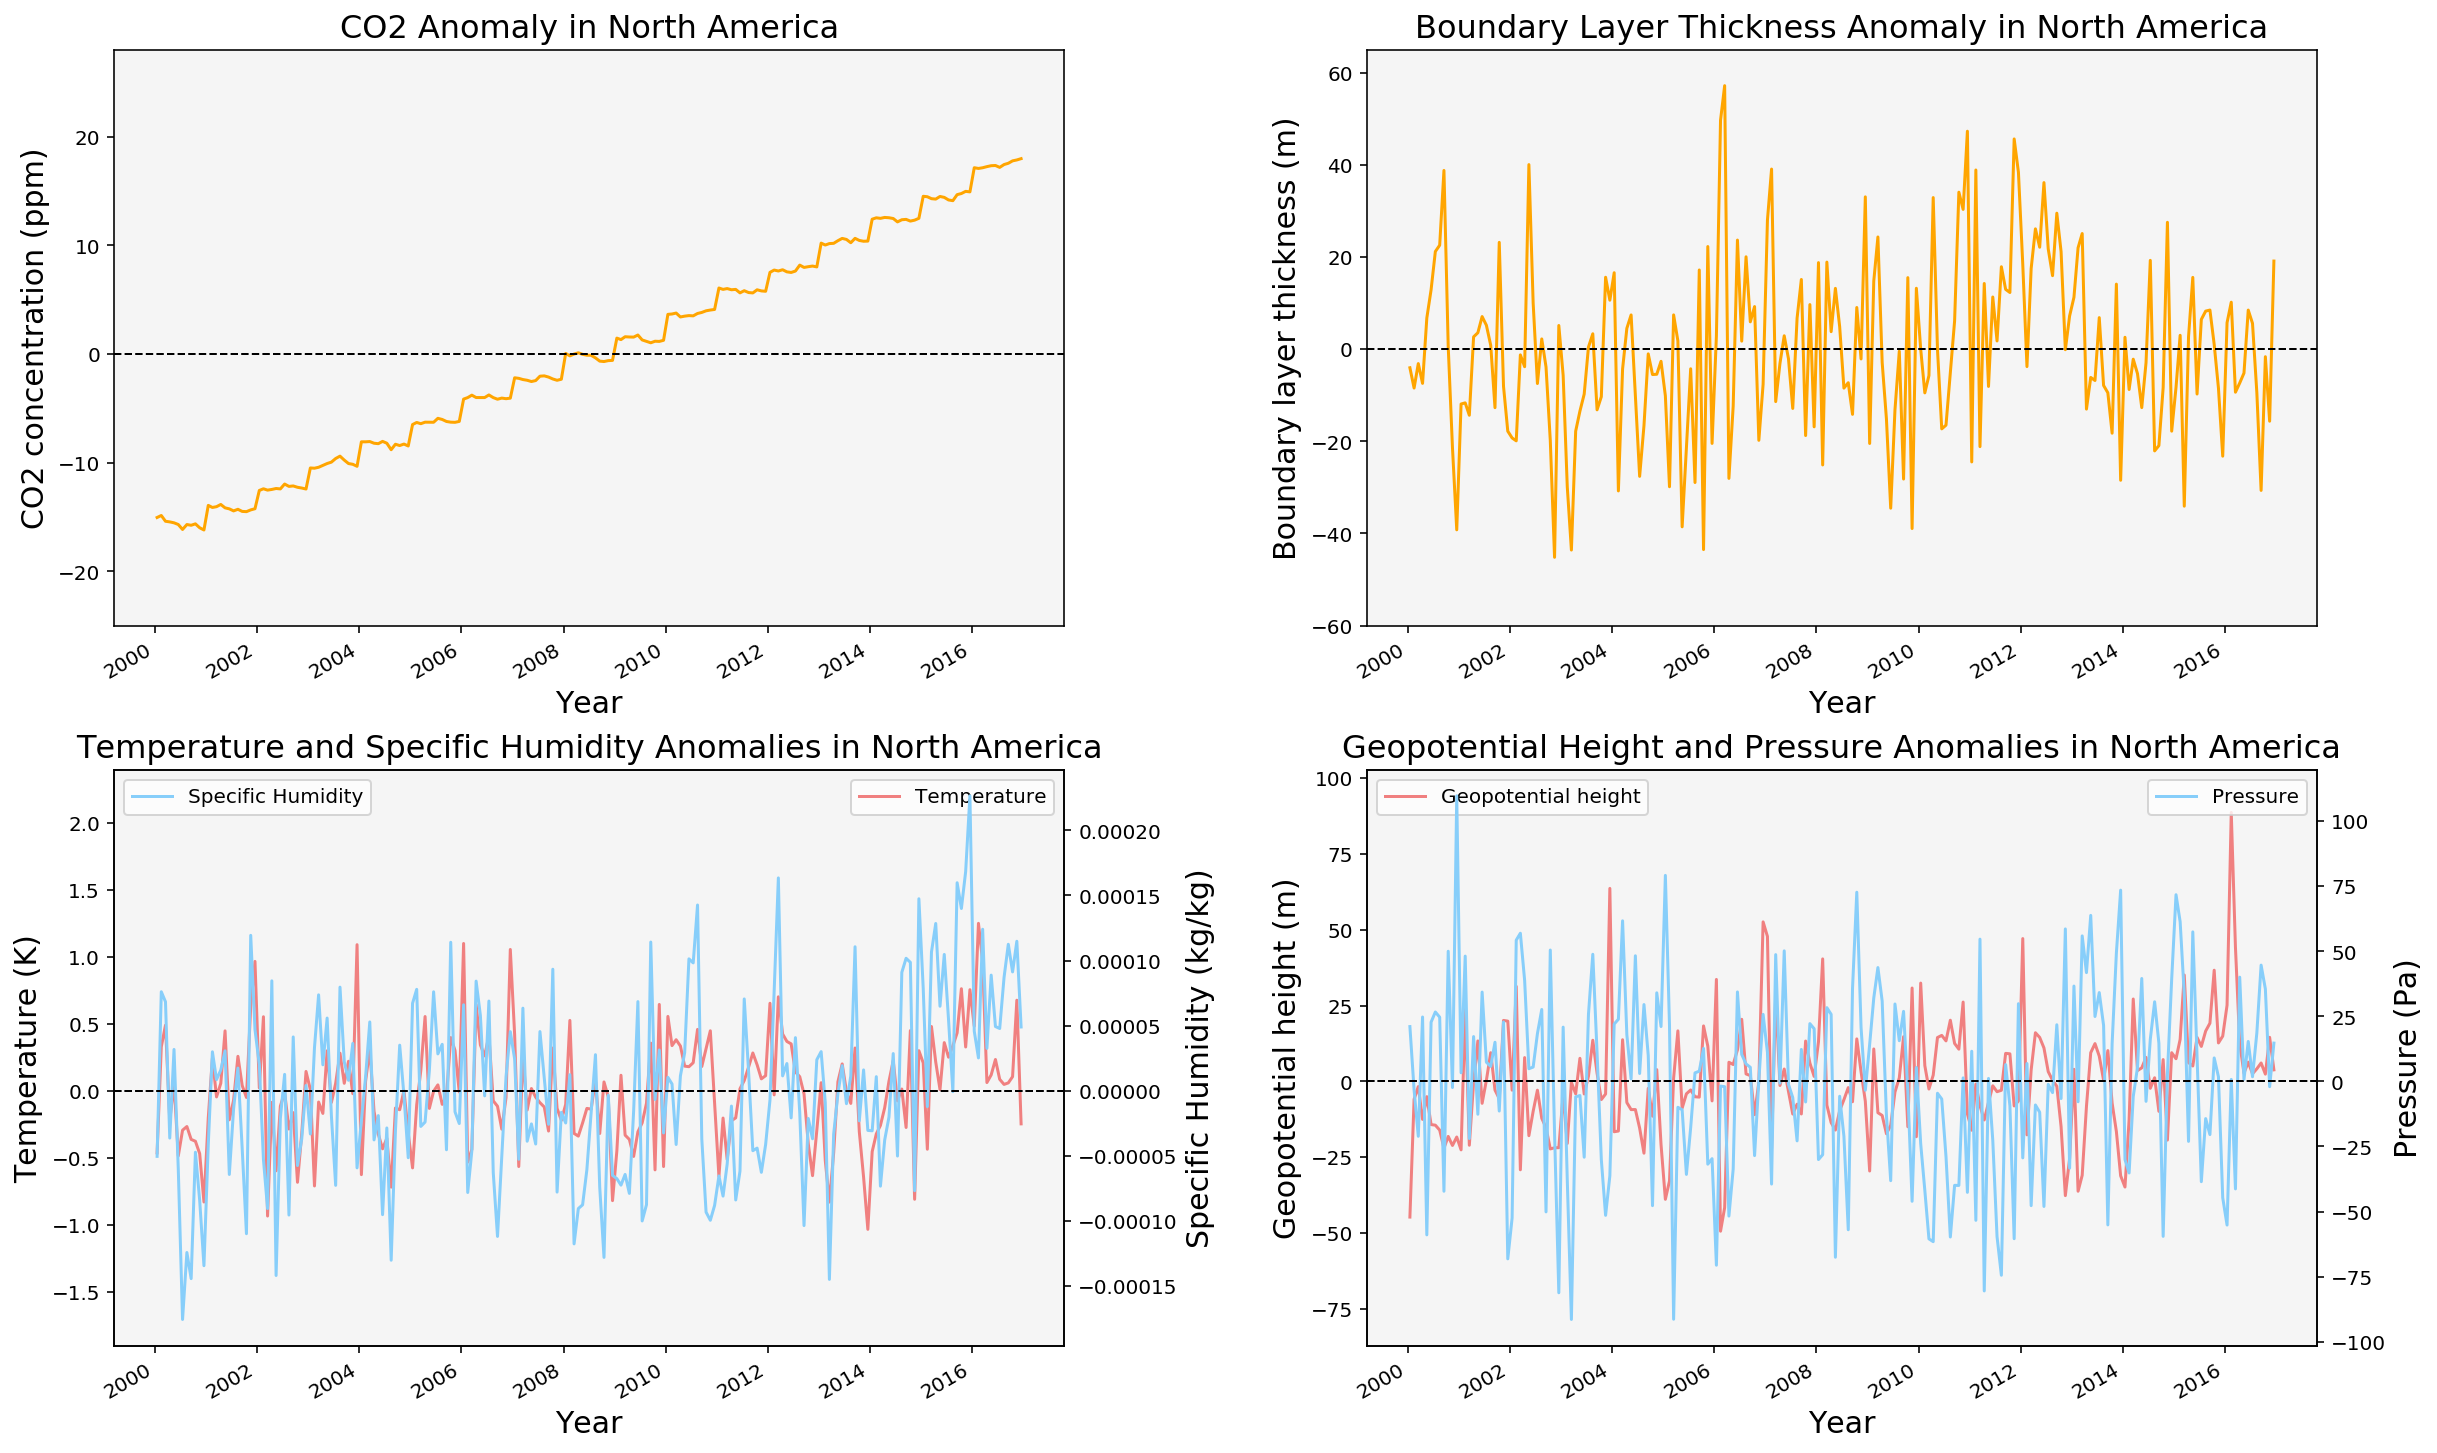

In [8]:
gb = ds.groupby('time.month')
ds_anom = gb-gb.mean(dim='time')

C_anom = ds_anom.co2.mean(dim=['latitude','longitude','level'])
T_anom = ds_anom.temperature.mean(dim=['latitude','longitude','level'])
S_anom = ds_anom.specific_humidity.mean(dim=['latitude','longitude','level'])
G_anom = ds_anom.gph.mean(dim=['latitude','longitude','boundary'])
P_anom = ds_anom.pressure.mean(dim=['latitude','longitude','boundary'])
B_anom = ds_anom.blh.mean(dim=['latitude','longitude'])

fig = plt.figure()

ax1 = fig.add_axes([1,1.25,1.1,1],facecolor='whitesmoke')

C_anom.plot(ax=ax1,linewidth=1.5,color='orange')
ax1.set_title('CO2 Anomaly in North America',fontsize=16)
ax1.set_ylabel('CO2 concentration (ppm)',fontsize=15)
ax1.set_xlabel('Year',fontsize=15)
ax1.axhline(y=0,linestyle='dashed',color='k',linewidth=1)
ax1.set_ylim(-25,28)

ax2 = fig.add_axes([1,0,1.1,1],facecolor='whitesmoke')

T_anom.plot(ax=ax2,linewidth=1.5,label='Temperature',color='lightcoral')
ax2.set_title('Temperature and Specific Humidity Anomalies in North America',fontsize=16)
ax2.set_ylabel('Temperature (K)',fontsize=15)
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylim(-2.0,2.3)
ax2.axhline(y=0,linestyle='dashed',color='k',linewidth=1)
ax2.legend()

ax3 = ax2.twinx()
S_anom.plot(ax=ax3,color='lightskyblue',linewidth=1.5,label='Specific Humidity')
ax3.set_ylabel('Specific Humidity (kg/kg)',fontsize=15)
ax3.set_xlabel('Year',fontsize=15)
ax3.axhline(y=0,linestyle='dashed',color='k',linewidth=1)
ax3.legend()

ax4 = fig.add_axes([2.45,0,1.1,1],facecolor='whitesmoke')

G_anom.plot(ax=ax4,linewidth=1.5,label='Geopotential height',color='lightcoral')
ax4.set_title('Geopotential Height and Pressure Anomalies in North America',fontsize=16)
ax4.set_ylabel('Geopotential height (m)',fontsize=15)
ax4.set_xlabel('Year',fontsize=15)
ax4.set_ylim(-80,110)
ax4.axhline(y=0,linestyle='dashed',color='k',linewidth=1)
ax4.legend()

ax5 = ax4.twinx()
P_anom.plot(ax=ax5,color='lightskyblue',linewidth=1.5,label='Pressure')
ax5.set_ylabel('Pressure (Pa)',fontsize=15)
ax5.set_xlabel('Year',fontsize=15)
ax5.axhline(y=0,linestyle='dashed',color='k',linewidth=1)
ax5.legend()

ax6 = fig.add_axes([2.45,1.25,1.1,1],facecolor='whitesmoke')

B_anom.plot(ax=ax6,linewidth=1.5,color='orange')
ax6.set_title('Boundary Layer Thickness Anomaly in North America',fontsize=16)
ax6.set_ylabel('Boundary layer thickness (m)',fontsize=15)
ax6.set_xlabel('Year',fontsize=15)
ax6.set_ylim(-60,65)
ax6.axhline(y=0,linestyle='dashed',color='k',linewidth=1)

# Matching the '0' of different y axes
def align_yaxis(ax1, v1, ax2, v2):
    """adjust the y axis of ax2 so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
    
align_yaxis(ax3, 0, ax2, 0)
align_yaxis(ax5, 0, ax4, 0)

## 3 The CO2 abundance and temperature in differnt heights

**The graphs show the variations of CO2, temperature vertically, and make comparision between different time periods.**

From the first graph, we can see that as the level gets higher, CO2 concentration gets lower, which means more CO2 on the surface than in the upper levels. This is because CO2 has larger density. But the vertical decreasing rate is not the same at different levels. And from the lines of 2000-2005 (blue), 2006-2010 (orange), and 2010-2016 (green), we can see that CO2 concentration is increasing every 5 years, and the distribution of increases in different levels is almost the same. From the second figure, we can see that temperature gets lower in levels below 18, but get higher in levels above. Therefore, we can speculate that the boundary of troposphere is near the level 18. And the negligible difference betweeen time periods shows that temperture did not change a lot on limited time scale.

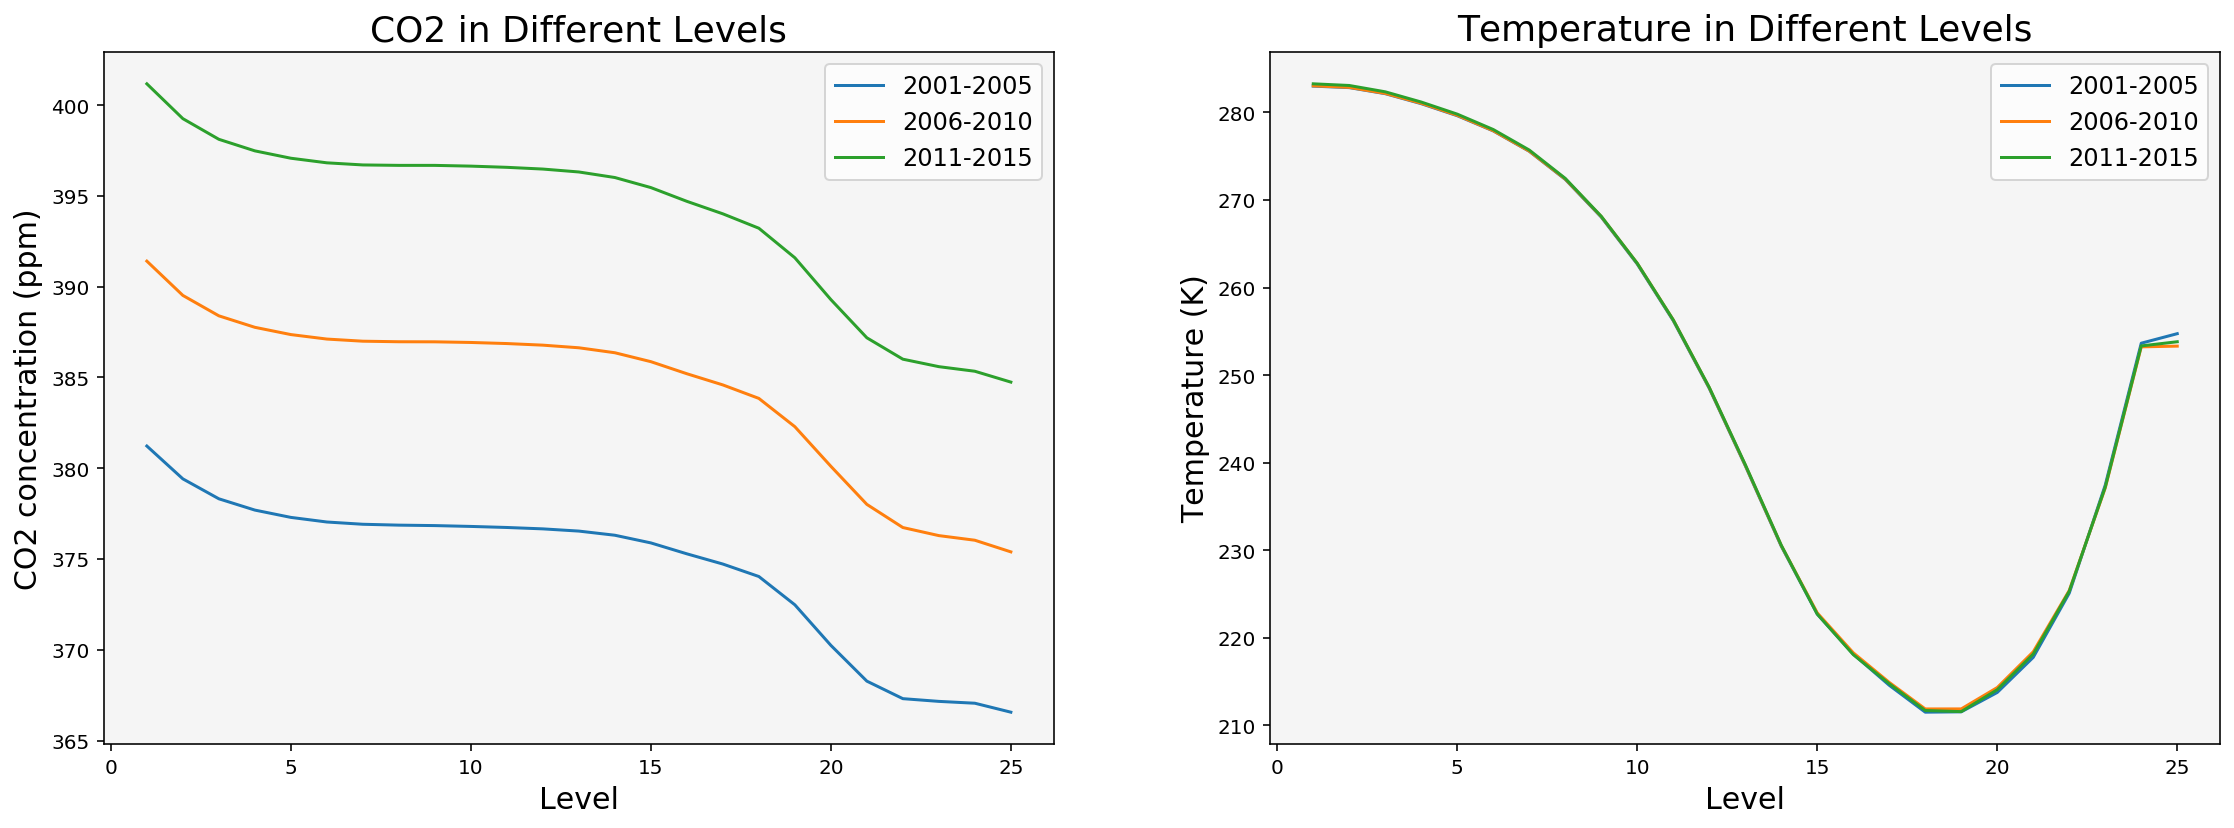

In [9]:
C_level_1 = ds.co2.sel(time=slice('2001-12-31','2005-12-31'))
C_level_2 = ds.co2.sel(time=slice('2006-12-31','2010-12-31'))
C_level_3 = ds.co2.sel(time=slice('2010-12-31','2015-12-31'))

level1 = C_level_1.mean(dim=['latitude','longitude','time'])
level2 = C_level_2.mean(dim=['latitude','longitude','time'])
level3 = C_level_3.mean(dim=['latitude','longitude','time'])

fig = plt.figure()

ax1 = fig.add_axes([1,0,1.1,1.2],facecolor='whitesmoke')

level1.plot(ax=ax1,label='2001-2005')
level2.plot(ax=ax1,label='2006-2010')
level3.plot(ax=ax1,label='2011-2015')
ax1.set_title('CO2 in Different Levels',fontsize=18)
ax1.set_ylabel('CO2 concentration (ppm)',fontsize=15)
ax1.set_xlabel('Level',fontsize=15)
ax1.legend(prop={'size': 12})

T_level_1 = ds.temperature.sel(time=slice('2001-12-31','2005-12-31'))
T_level_2 = ds.temperature.sel(time=slice('2006-12-31','2010-12-31'))
T_level_3 = ds.temperature.sel(time=slice('2010-12-31','2015-12-31'))

level_1 = T_level_1.mean(dim=['latitude','longitude','time'])
level_2 = T_level_2.mean(dim=['latitude','longitude','time'])
level_3 = T_level_3.mean(dim=['latitude','longitude','time'])

ax2 = fig.add_axes([2.35,0,1.1,1.2],facecolor='whitesmoke')

level_1.plot(ax=ax2,label='2001-2005')
level_2.plot(ax=ax2,label='2006-2010')
level_3.plot(ax=ax2,label='2011-2015')
ax2.set_title('Temperature in Different Levels',fontsize=18)
ax2.set_ylabel('Temperature (K)',fontsize=15)
ax2.set_xlabel('Level',fontsize=15)
ax2.legend(prop={'size': 12})

## 4 The distribution of CO2 and temperature in North America

**The graph shows the mean CO2 from 2000 to 2016 in North America**

The concentration of CO2 fluctuates regionally over time due to natural life processes, people burning oil, coal, and biomass. The graph of CO2 shows that CO2 concentration is higher in lower latitude, this is probably because regions in lower altitudes support more biomass to generate CO2. 

Comparing different regions in North America, we can point out that the CO2 concentration is higher in specific regions. For example, California and some regions in the southeastern NA have the highest mean CO2 concentration (from 2000 to 2016). This result may be related to the amount of CO2 emission. According to research, Los Angeles has the most CO2 emission per year in the US, and Texas, California and Florida are have the highest emission levels.

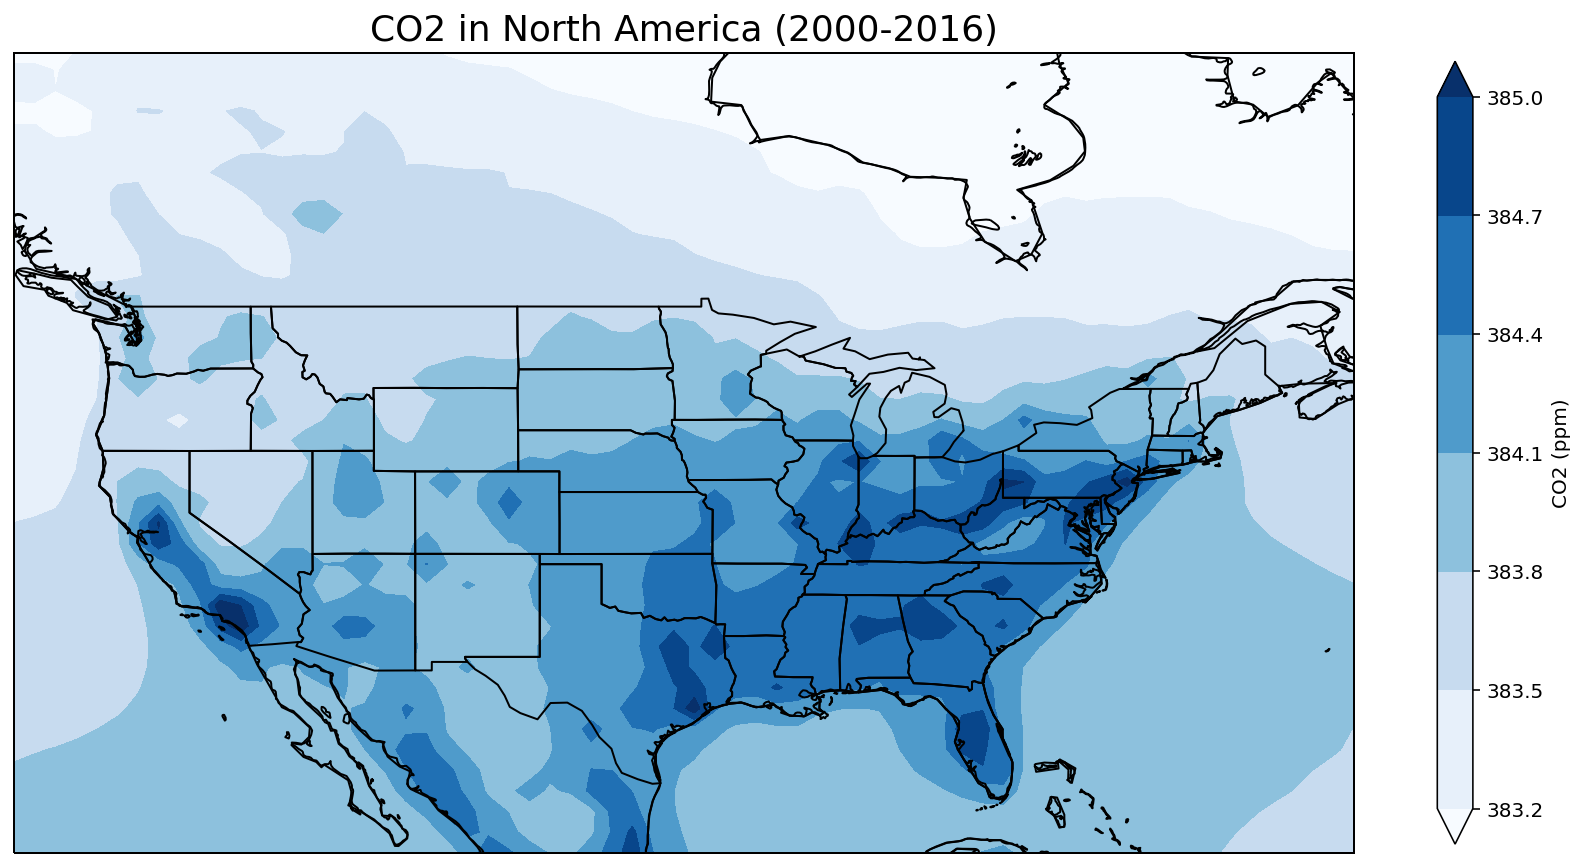

In [10]:
extent = [-128.5, -63.5, 22.5, 57.5]

fig,ax = plt.subplots(figsize=(15,18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines()
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.STATES)

CO2 = ds.co2.mean(dim=['level','time'])
p1 = ax.contourf(CO2.longitude,CO2.latitude, CO2, cmap='Blues',extend='both')
ax.set_title('CO2 in North America (2000-2016)',fontsize=18)
fig.colorbar(p1,shrink=0.4,label='CO2 (ppm)')

**The graphs show the distribution of temperature and other related parameters in North America**

The graph of Temperature shows that the lower the latitude, the higher the temperature. But there are some exceptional regions. At the same latitude, we can see that temperature in some western regions is lower than the temperature in other eastern regions. This lower temperature may the results of some geographical characteristics, such as higher altitudes. The graph of orography can support this assumption. Moreover, from the similarity of the graphs of temperature and air mass, we can conclude that they are correlated with each other. 

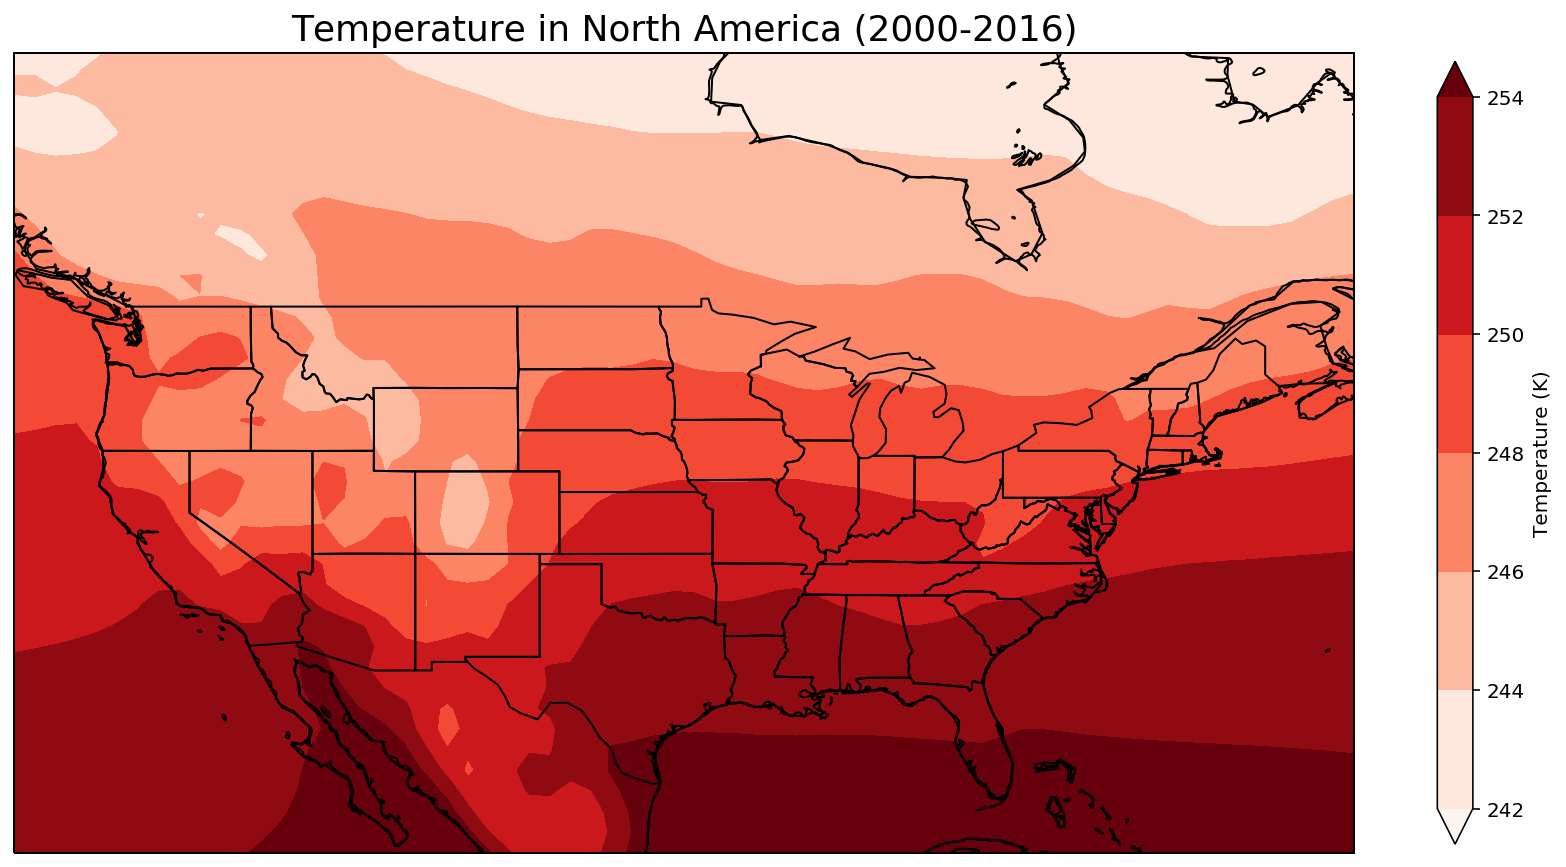

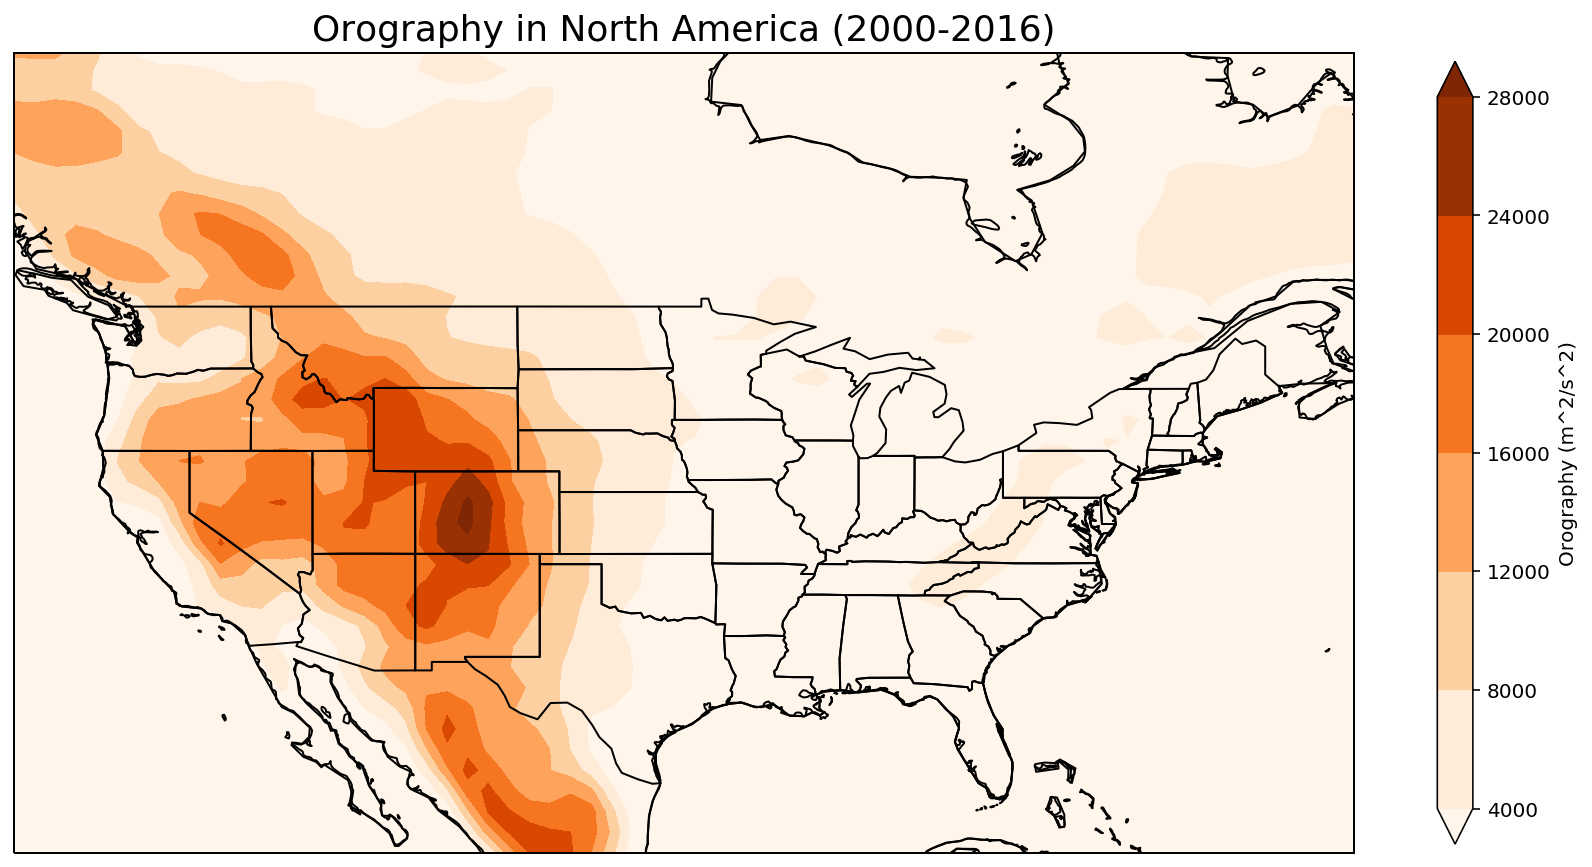

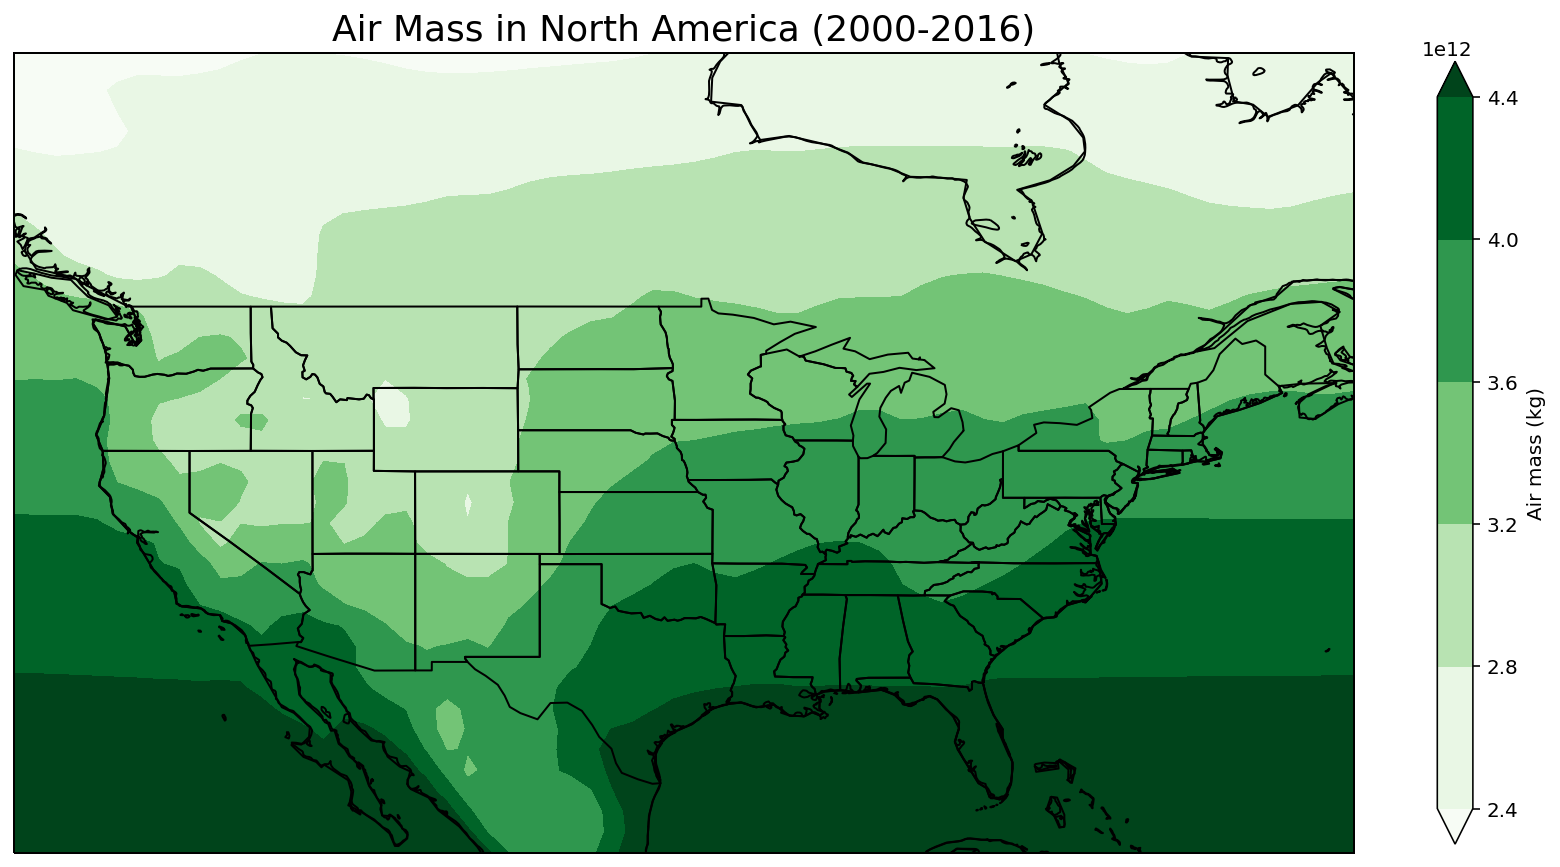

In [11]:
fig,ax = plt.subplots(figsize=(15,18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines()
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.STATES)

Tem = ds.temperature.mean(dim=['level','time'])
# Tem.plot(ax=ax,cmap='Reds',cbar_kwargs={'shrink': 0.5})
p2 = ax.contourf(Tem.longitude,Tem.latitude, Tem, cmap='Reds',extend='both')
ax.set_title('Temperature in North America (2000-2016)',fontsize=18)
fig.colorbar(p2,shrink=0.4,label='Temperature (K)')


fig,ax = plt.subplots(figsize=(15,18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines()
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.STATES)

OR = ds.orography.mean(dim=['time'])
p4 = ax.contourf(OR.longitude,OR.latitude, OR, cmap='Oranges',extend='both')
ax.set_title('Orography in North America (2000-2016)',fontsize=18)
fig.colorbar(p4,shrink=0.4,label='Orography (m^2/s^2)')


fig,ax = plt.subplots(figsize=(15,18))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines()
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.STATES)

AM = ds.air_mass.mean(dim=['level','time'])
p3 = ax.contourf(AM.longitude,AM.latitude, AM, cmap='Greens',extend='both')
ax.set_title('Air Mass in North America (2000-2016)',fontsize=18)
fig.colorbar(p3,shrink=0.4,label='Air mass (kg)')